In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [5]:
# Load the stock market data csv file
df = pd.read_csv('dataset_new.csv')
df = df['close'].values.reshape(-1, 1)

In [6]:
# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(df)

In [7]:
# Function to create sequences and labels for training the LSTM model
def create_sequences(data, seq_length):
    sequences = []
    labels = []
    for i in range(len(data) - seq_length):
        
        seq = df[i:i + seq_length]
        label = df[i + seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)


In [8]:
# Define the sequence length and split the data into sequences and labels
sequence_length = 10
X, y = create_sequences(data_normalized, sequence_length)

In [9]:
# Split the data into training and testing sets
split = int(0.8 * len(df))
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))


In [11]:
# compile model using adam
model.compile(optimizer='adam', loss='mean_squared_error')

In [12]:
# train model
model.fit(X_train, y_train, epochs=10, batch_size=35)

Epoch 1/10
58/58 [==============================] - 1s 4ms/step - loss: 0.1064
Epoch 2/10
58/58 [==============================] - 0s 4ms/step - loss: 0.0053
Epoch 3/10
58/58 [==============================] - 0s 4ms/step - loss: 0.0045
Epoch 4/10
58/58 [==============================] - 0s 4ms/step - loss: 0.0040
Epoch 5/10
58/58 [==============================] - 0s 4ms/step - loss: 0.0038
Epoch 6/10
58/58 [==============================] - 0s 4ms/step - loss: 0.0036
Epoch 7/10
58/58 [==============================] - 0s 4ms/step - loss: 0.0035
Epoch 8/10
58/58 [==============================] - 0s 4ms/step - loss: 0.0034
Epoch 9/10
58/58 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 10/10
58/58 [==============================] - 0s 4ms/step - loss: 0.0033


In [13]:
# Make predictions on the test data
predictions = model.predict(X_test)


16/16 [==============================] - 0s 1ms/step


In [14]:
# Inverse transform the predictions and actual values to original scale
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

In [15]:
# Evaluate the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.12127800305536164


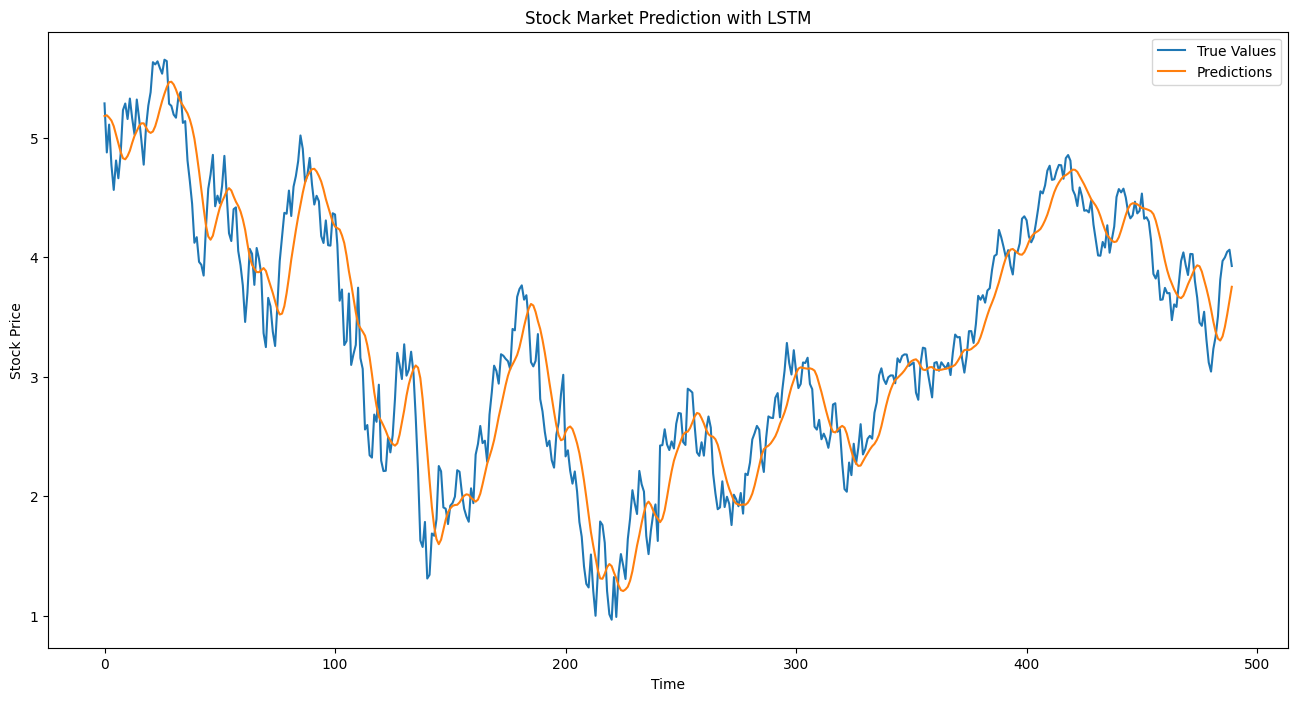

In [16]:
plt.figure(figsize=(16, 8))
plt.plot(y_test, label='True Values')
plt.plot(predictions, label='Predictions')
plt.title('Stock Market Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()